# Weather Report



Before working on this notebook please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the notebook.Please familiarize yourself with the criteria before beginning the notebook.

This project requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this notebook. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this notebook is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairoâ€™s principles of truth, beauty, function, and insight.

Here are the notebook instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.


#  Region and Domain

for this notebook data used can be found at The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network (GHCN-Daily) and it contains daily climate records coming from the 12 stations near New Orleans over the period from Jan 01, 2005 to Dec 31, 2015.
#Region and Domain for the asignment is weather where we will compare the temprature change within the years 2005 to 2015.

# Research Question

how the temprature near the michigan area deviated over a period of time further if we train some model over the same data it can also predict how much tempratures will be deviate in the near future.

# Links

An NOAA dataset has been stored in the file data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.
links are given below for the data set:
1.https://github.com/himanshi798/Plotting-temperatures-/blob/master/BinSize_d400.csv
2. data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv


# Image

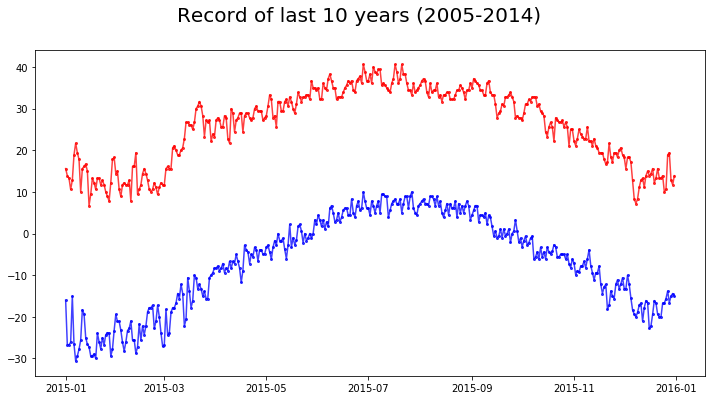

In [31]:
#CODE FOR THE IMAGE IS GIVEN BELOW
#importing libraries
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


#first we will import required data
#This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe
df = pd.read_csv('data/C2A2_data/BinSize_d400.csv')
data=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv') 


#the highest and lowest temperatures for areas near michigan is extracted for each day of the year over the period 2005-2014 using pandas and separatly plotted so that we can see the variation of temprature near the area of michigan. These highs and lows are plotted as line graphs using matplotlib.

#The IDs won't be used
data = data.drop("ID", axis=1)

#A date_index object that will be used for several tasks
date_index = pd.DatetimeIndex(data['Date'])

#Removing the leap days: Feb 29
data = data[~((date_index.is_leap_year) & (date_index.month == 2) & (date_index.day == 29))]

#How many records?
len(data)

#Refreshing the date_index
date_index = pd.DatetimeIndex(data['Date'])

#The main index will be the Monty-Day combination
data["Month"] = date_index.month
data["Day"] = date_index.day

data_2015 = data[date_index >= "2015-01-01"]
data = data[date_index < "2015-01-01"]

#The maximum temperatures records
data_max = data[data["Element"]=="TMAX"].groupby(["Month", "Day"])["Data_Value"].max()
data_max = data_max / 10
data_max.head()

#The minimum temperatures records
data_min = data[data["Element"]=="TMIN"].groupby(["Month", "Day"])["Data_Value"].min()
data_min = data_min / 10
data_min.head()


mpl.rcParams['figure.figsize'] = (12, 6)

plt.suptitle("Record of last 10 years (2005-2014)", fontsize=20)



plt.plot(observation_axis, data_min.as_matrix(), '-o', color='blue', ms=2, alpha=0.75) 
plt.plot(observation_axis, data_max.as_matrix(), '-o', color='red', ms=2, alpha=0.75) 

37
32


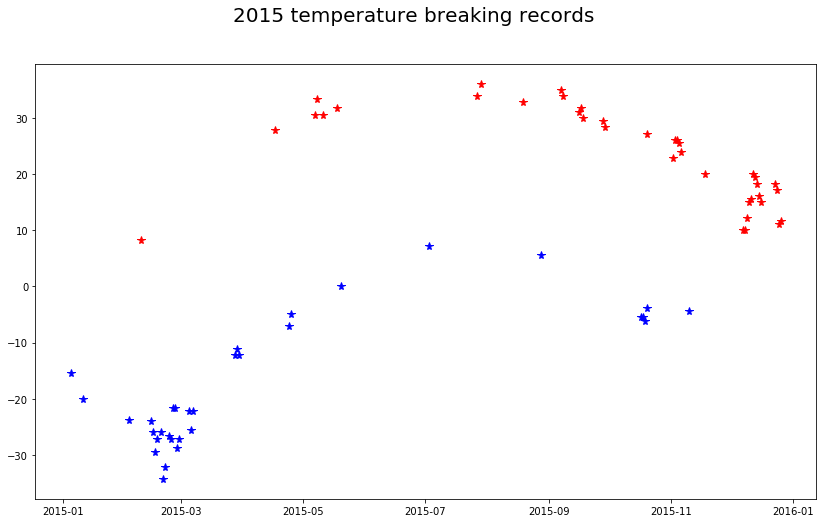

In [32]:
#record breaking temperatures for the year 2015 are scattered in the the different graph. Both the Celsius and Fahrenheit scales are included as the left and right y-axis respectively; the month labels are centrally placed between the ticks denoting the start and end of each month in the x-axis.

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (14, 8)



plt.suptitle("2015 temperature breaking records", fontsize=20)

#The 2015 maximum temperatures records
data_2015_max = data_2015[data_2015["Element"]=="TMAX"].groupby(["Month", "Day"])["Data_Value"].max()
data_2015_max = data_2015_max / 10
data_2015_max.head()
#The 2015 minimum temperatures records
data_2015_min = data_2015[data_2015["Element"]=="TMIN"].groupby(["Month", "Day"])["Data_Value"].min()
data_2015_min = data_2015_min / 10
data_2015_min.head()

#When where the records broken?
max_rec_broken = (data_2015_max > data_max).as_matrix()
print(np.sum(max_rec_broken))
min_rec_broken = (data_2015_min < data_min).as_matrix()
print(np.sum(min_rec_broken))




#2015 record temperatures
plt.plot(observation_axis[max_rec_broken], data_2015_max[max_rec_broken].as_matrix(), 'r*',
         observation_axis[min_rec_broken], data_2015_min[min_rec_broken].as_matrix(), 'b*', 
         ms=8, alpha=1.0)


37
32


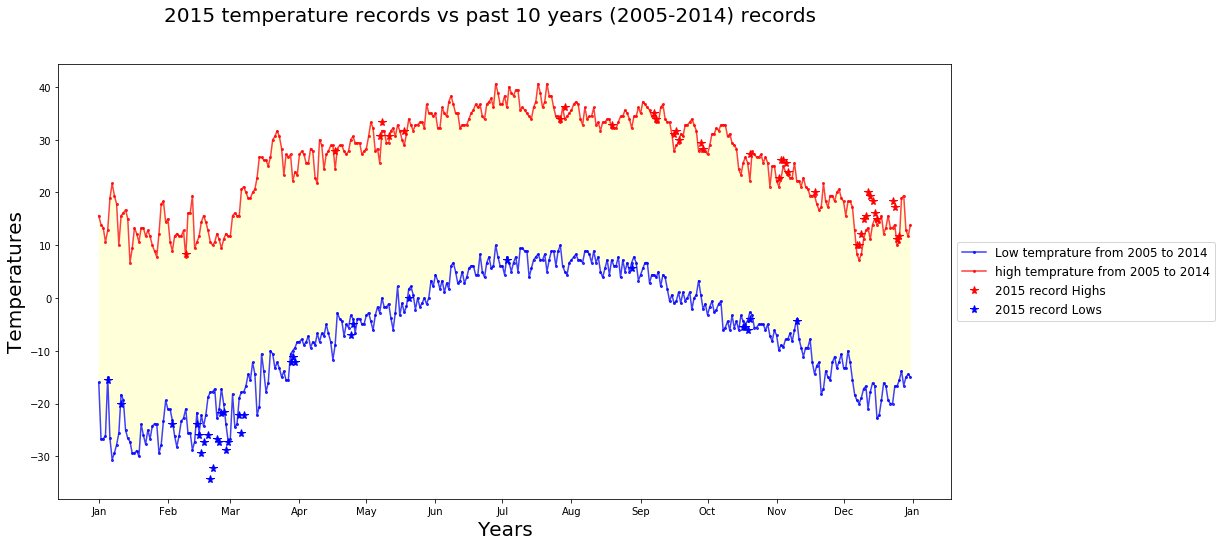

In [33]:

#cleaning the data
#The IDs won't be used
data = data.drop("ID", axis=1)

#A date_index object that will be used for several tasks
date_index = pd.DatetimeIndex(data['Date'])

#Removing the leap days: Feb 29
data = data[~((date_index.is_leap_year) & (date_index.month == 2) & (date_index.day == 29))]

#How many records?
len(data)

#Refreshing the date_index
date_index = pd.DatetimeIndex(data['Date'])

#The main index will be the Monty-Day combination
data["Month"] = date_index.month
data["Day"] = date_index.day

data_2015 = data[date_index >= "2015-01-01"]
data = data[date_index < "2015-01-01"]

#The maximum temperatures records
data_max = data[data["Element"]=="TMAX"].groupby(["Month", "Day"])["Data_Value"].max()
data_max = data_max / 10
data_max.head()

#The minimum temperatures records
data_min = data[data["Element"]=="TMIN"].groupby(["Month", "Day"])["Data_Value"].min()
data_min = data_min / 10
data_min.head()
#The 2015 maximum temperatures records
data_2015_max = data_2015[data_2015["Element"]=="TMAX"].groupby(["Month", "Day"])["Data_Value"].max()
data_2015_max = data_2015_max / 10
data_2015_max.head()
#The 2015 minimum temperatures records
data_2015_min = data_2015[data_2015["Element"]=="TMIN"].groupby(["Month", "Day"])["Data_Value"].min()
data_2015_min = data_2015_min / 10
data_2015_min.head()

#When where the records broken?
max_rec_broken = (data_2015_max > data_max).as_matrix()
print(np.sum(max_rec_broken))
min_rec_broken = (data_2015_min < data_min).as_matrix()
print(np.sum(min_rec_broken))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 8)

observation_axis = np.arange('2015-01-01', '2016-01-01', dtype='datetime64[D]')
observation_axis = np.array(list(map(pd.to_datetime, observation_axis)))

plt.suptitle("2015 temperature records vs past 10 years (2005-2014) records", fontsize=20)


#Past record temperatures
plt.plot(observation_axis, data_min.as_matrix(), '-o', color='blue', ms=2, alpha=0.75) 
plt.plot(observation_axis, data_max.as_matrix(), '-o', color='red', ms=2, alpha=0.75) 

#2015 record temperatures
plt.plot(observation_axis[max_rec_broken], data_2015_max[max_rec_broken].as_matrix(), 'r*',
         observation_axis[min_rec_broken], data_2015_min[min_rec_broken].as_matrix(), 'b*', 
         ms=8, alpha=1.0)

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.legend(['Low temprature from 2005 to 2014', 'high temprature from 2005 to 2014', "2015 record Highs", "2015 record Lows"], loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size':12})

plt.gca().fill_between(observation_axis, data_min, data_max, facecolor='yellow', alpha=0.15)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Temperatures', fontsize=20)








# Discussion

Firstly,the highest and lowest temperatures for areas near michigan is extracted for each day of the year over the period 2005-2014 using pandas and separatly plotted so that we can see the variation of temprature near the area of michigan. These highs and lows are plotted as line graphs using matplotlib.
then record breaking temperatures for the year 2015 are scattered in the the different graph. Both the Celsius and Fahrenheit scales are included as the left and right y-axis respectively; the month labels are centrally placed between the ticks denoting the start and end of each month in the x-axis.
Secondly,the highest and lowest temperatures for areas near michigan is extracted for each day of the year over the period 2005-2014 using pandas. These highs and lows are plotted as line graphs using matplotlib and then record breaking temperatures for the year 2015 are scattered in the same graph. Both the Celsius and Fahrenheit scales are included as the left and right y-axis respectively; the month labels are centrally placed between the ticks denoting the start and end of each month in the x-axis. The verbal description in terms of legends, labels and title is minimalist, and every aspect of the graph, including the color palette, is thoughtfully chosen to convey the information visually. The effort is to make the graph look neat, accurate, informative and visually appealing.
these three visuals shows the complete detail discription of tempratures over the period 2005-2015.